<a href="https://colab.research.google.com/github/wooookim/-/blob/main/KNN_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

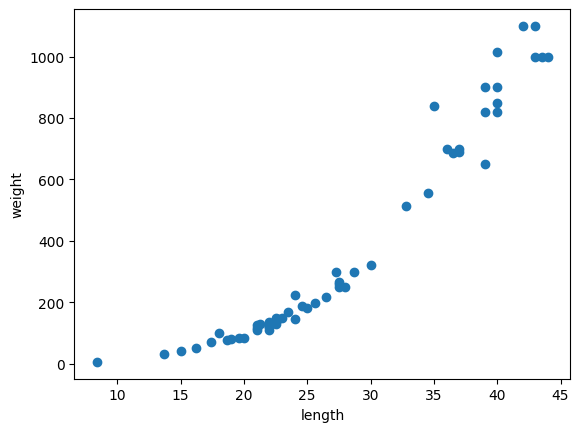

In [4]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**사이킷런 훈련 데이터 = 2차원 배열**

In [13]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [14]:
test_array = np.array([1,2,3,4])
print(test_array)
print(test_array.shape)

[1 2 3 4]
(4,)


**reshape() 매서드로 재배열**

In [9]:
test_array = test_array.reshape(2, 2)
print(test_array)
print(test_array.shape)

[[1 2]
 [3 4]]
(2, 2)


In [15]:
train_input = train_input.reshape(-1, 1)  # = train_input.reshape(42, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


**결정계수 R**

회귀 모델 평가

1 - {((타겟 - 예측) **2 합) / ((타겟 - 평균) **2 합)}

평균을 겨냥했을 경우 0에 가까워지고, 예측을 겨냥할 경우 1에 가까워짐

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


In [20]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction) # 실제값 - 예측값 오차 반환
print(mae)

19.157142857142862


In [21]:
print(knr.score(train_input, train_target))

0.9698823289099254


**과대 적합**

훈련 세트에서 점수가 높았으나 테스트 세트에서 점수가 떨어지는 경우 = 과대적합

ex) k 값을 늘린다

**과소 적합**

훈련/테스트 세트 모두 점수가 낮은 경우 = 과소적합

모델이 너무 단순

훈련/테스트 데이터 세트 크기가 너무 작은 경우

ex) k 값을 줄인다

In [22]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [23]:
print(knr.score(test_input, test_target))

0.9746459963987609


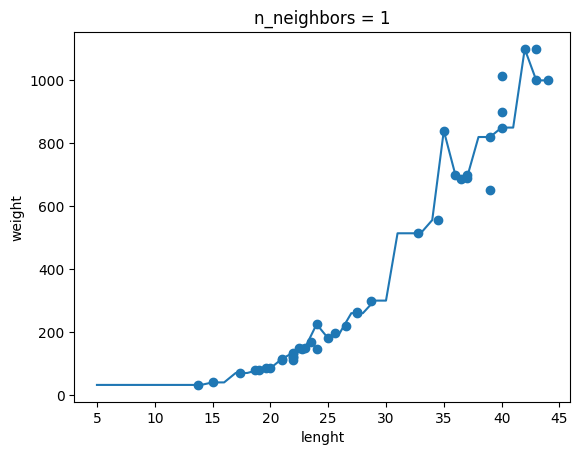

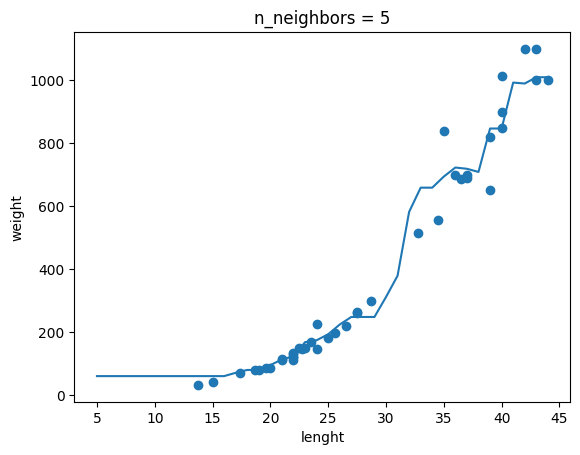

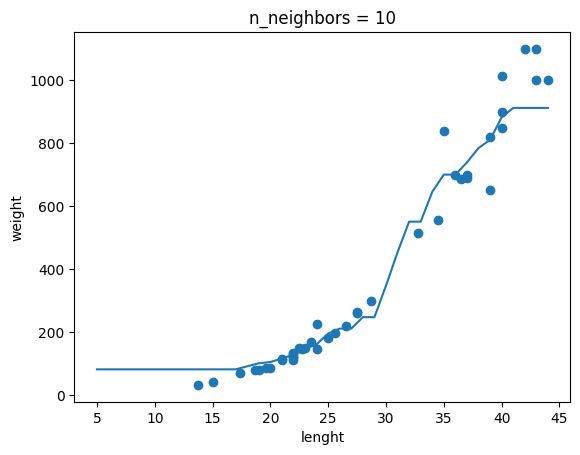

In [27]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction) # 선 그래프
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('lenght')
  plt.ylabel('weight')
  plt.show()

n 값이 증가하면서 모델이 단순해짐

최근접 이웃 샘플들로 확인한 타겟 x값- > 이웃들 평균으로 예측